In [1]:
import numpy as np
from math import factorial
from math import pi
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams.update({'figure.max_open_warning': 0})

%matplotlib inline

In [2]:
#Define n and m for zernike polynomials according to nolls ordering
n = [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]
m = [0, 1, -1, 0, -2, 2, -1, 1, -3, 3, 0, 2, -2, 4, -4, 1, -1, 3, -3, 5, -5]
j = np.arange(1,len(n)+1,1)

def radial_zernike(n,m,rho):
    """Returns the radial part of the zernike polynomial. 
    n and m should be integers, while rho HAS to be a numpy array
    Returns an array the same size as rho with the radial coefficients."""
    if (n-m) & 0x1 == 0: #check if even
        s_max = int((n-abs(m))/2)
        radial = np.zeros(shape=rho.shape)
        for s in range(s_max + 1):
            prefactor = (-1)**s * factorial(n-s) / (factorial(s) * factorial((n+abs(m))/2 - s) * factorial((n-abs(m))/2 - s))
            radial += np.power(rho,(n - 2*s)) * prefactor
    else:
        radial = np.zeros(shape=rho.shape)
    return radial

def angular_zernike(m,theta):
    """Returns the angular part of the zernike polynomial. 
    m should be an integer, angle can be an array.
    returns an array the same size as theta (or a scalar if m = 0)
    """
    if m > 0:
        angular = np.cos(m*theta)
    elif m < 0:
        angular = np.sin(abs(m)*theta)
    else:
        angular = 1
    return angular
    
def zernike_m_n(n,m,rho,theta):
    "Returns the value of the zernike polynomial given n, m, r and theta"
    return radial_zernike(n,m,rho) * angular_zernike(m,theta)

def cart2pol(x, y):
    "returns polar coordinates given x and y"
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return[x, y]


def zernike_x_y(x, y, ai):
    """Returns the value of composed wavefield given the position x and y, 
    and the vector ai with the zernike polynomial weights
    """
    [r, theta] = cart2pol(x, y)
    Z = 0
    for i in range(len(ai)):
        Z += ai[i]*zernike_m_n(n[i],m[i],r,theta)
    return Z

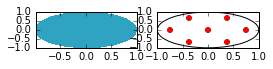

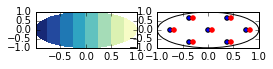

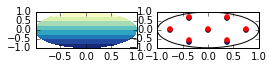

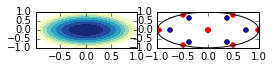

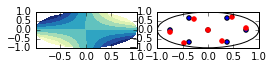

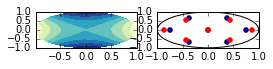

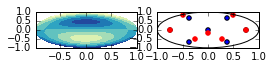

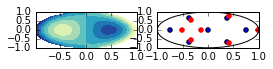

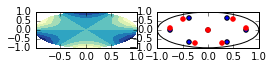

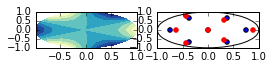

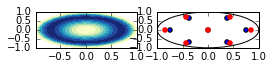

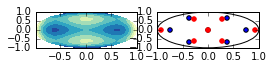

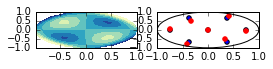

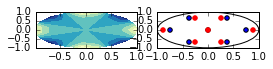

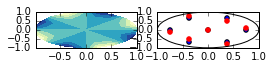

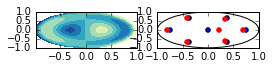

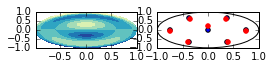

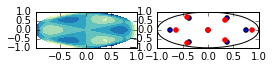

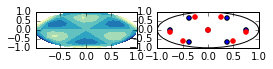

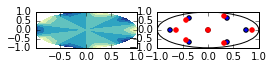

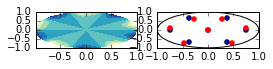

In [3]:
#Set lenslet array parameters
width_lenslet = 0.25
width_lenslet_half = width_lenslet/2
f  = 0.1

#Lenslet array
r = [[0.75] for i in range(6)]
theta = [[2*pi*i/6] for i in range(6)]
lens_0 = np.array([[0, 0]])
lens_array_pol = np.hstack((r,theta))
lens_array_pol = np.concatenate((lens_array_pol,lens_0),axis=0)
lens_array = np.array(pol2cart(lens_array_pol[:,0], lens_array_pol[:,1])).T

#set 3d display parameters
r = np.linspace(0,1,20)
theta = np.linspace(0, 2*pi, 20)
radius_matrix, theta_matrix = np.meshgrid(r,theta)
X, Y = radius_matrix*np.cos(theta_matrix), radius_matrix*np.sin(theta_matrix)

SH_pattern = np.zeros((7,2,len(j)))

subplot_count = 1
for i in range(len(j)):
    ai = np.zeros(len(j))
    ai[i] = 0.75
    lens_x = lens_array[:,0]
    lens_y = lens_array[:,1]
    dx = np.array(zernike_x_y(lens_x + width_lenslet_half, lens_y, ai) - zernike_x_y(lens_x - width_lenslet_half, lens_y, ai))
    dy = np.array(zernike_x_y(lens_x, lens_y + width_lenslet_half, ai) - zernike_x_y(lens_x, lens_y- width_lenslet_half, ai))
    dr = np.vstack((dx,dy))
    dr_lens = dr*f / width_lenslet
    SH_pattern[...,i] = np.vstack((lens_x + dr_lens[0,:], lens_y + dr_lens[1,:])).T
    
    fig = plt.figure(figsize=plt.figaspect(5.))
    Z = zernike_m_n(n[i],m[i],radius_matrix, theta_matrix)
    ax = fig.add_subplot(len(j), 2, subplot_count)
    subplot_count += 1
    # = fig.add_subplot(121, projection='3d')
    ax.contourf(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
    #ax.set_zlim3d(-1, 1)
    
    #ax2 = fig.add_subplot(122)
    ax = fig.add_subplot(len(j), 2, subplot_count)
    subplot_count += 1
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])    
    ax.scatter(lens_array[:,0], lens_array[:,1])
    ax.scatter(SH_pattern[:,0,i], SH_pattern[:,1,i], color = 'r')
    circle=plt.Circle((0,0),1,color='k',fill=False)
    ax2 = plt.gca()
    ax2.add_artist(circle)

plt.show()

In [8]:
#Set lenslet array parameters
width_lenslet = 0.25
width_lenslet_half = width_lenslet/2
f  = 0.1

#Lenslet array
# r = [[0.75] for i in range(6)]
# theta = [[2*pi*i/6] for i in range(6)]
# lens_0 = np.array([[0, 0]])
# lens_array_pol = np.hstack((r,theta))
# lens_array_pol = np.concatenate((lens_array_pol,lens_0),axis=0)
# lens_array = np.array(pol2cart(lens_array_pol[:,0], lens_array_pol[:,1])).T
lens_array = np.array([[0, 0], [1, 0], [0,1]])

# set 3d display parameters
r = np.linspace(0,1,20)
theta = np.linspace(0, 2*pi, 20)
radius_matrix, theta_matrix = np.meshgrid(r,theta)
X, Y = radius_matrix*np.cos(theta_matrix), radius_matrix*np.sin(theta_matrix)
# X = [0, 0, 1]
# Y = [0, 1, 0]


SH_pattern = np.zeros((len(X),2,len(j)))

subplot_count = 1
for i in range(len(j)):
    ai = np.zeros(len(j))
    ai[i] = 0.75
    lens_x = lens_array[:,0]
    lens_y = lens_array[:,1]
    dx = np.array(zernike_x_y(lens_x + width_lenslet_half, lens_y, ai) - zernike_x_y(lens_x - width_lenslet_half, lens_y, ai))
    dy = np.array(zernike_x_y(lens_x, lens_y + width_lenslet_half, ai) - zernike_x_y(lens_x, lens_y- width_lenslet_half, ai))
    dr = np.vstack((dx,dy))
    dr_lens = dr*f / width_lenslet
    SH_pattern[...,i] = np.vstack((lens_x + dr_lens[0,:], lens_y + dr_lens[1,:])).T
    
    fig = plt.figure(figsize=plt.figaspect(5.))
    Z = zernike_m_n(n[i],m[i],radius_matrix, theta_matrix)
    ax = fig.add_subplot(len(j), 2, subplot_count)
    subplot_count += 1
    # = fig.add_subplot(121, projection='3d')
    ax.contourf(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
    #ax.set_zlim3d(-1, 1)
    
    #ax2 = fig.add_subplot(122)
    ax = fig.add_subplot(len(j), 2, subplot_count)
    subplot_count += 1
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])    
    ax.scatter(lens_array[:,0], lens_array[:,1])
    ax.scatter(SH_pattern[:,0,i], SH_pattern[:,1,i], color = 'r')
    circle=plt.Circle((0,0),1,color='k',fill=False)
    ax2 = plt.gca()
    ax2.add_artist(circle)

plt.show()

ValueError: could not broadcast input array from shape (3,2) into shape (20,2)

In [6]:
lens_array.shape

(7, 2)